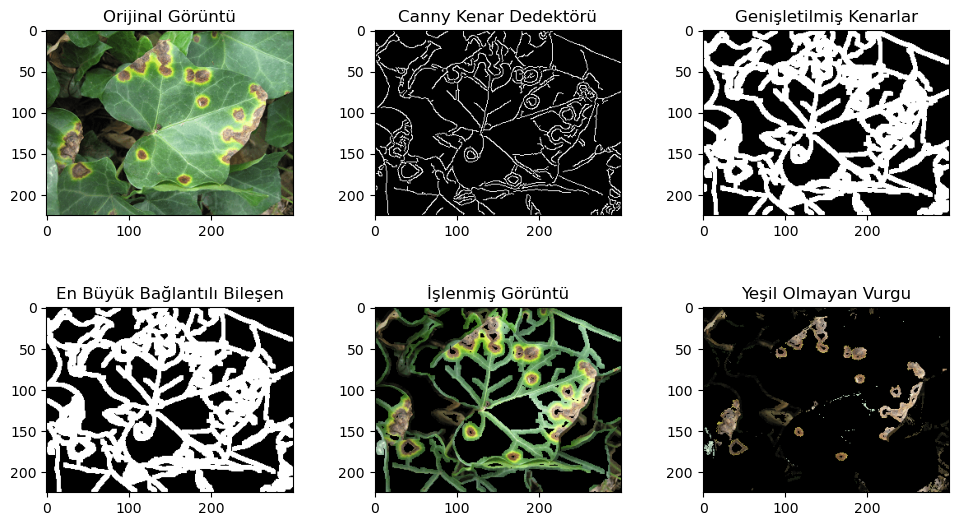

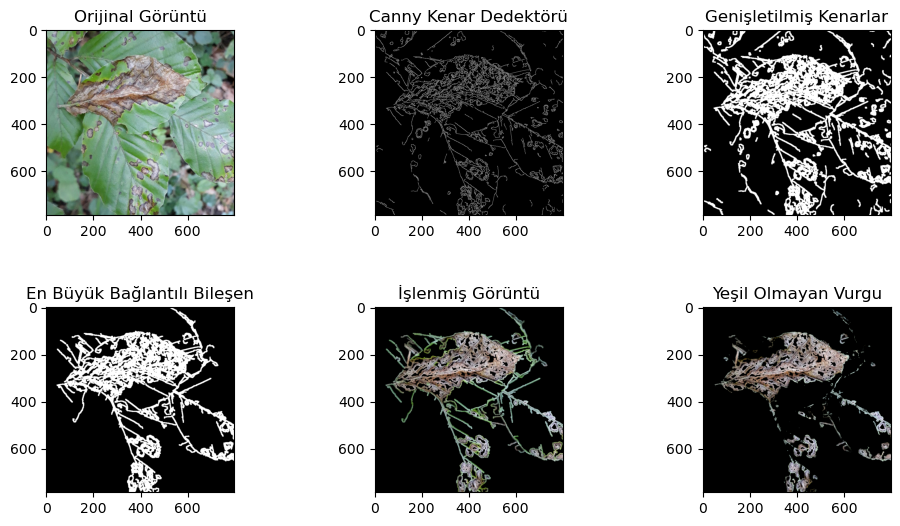

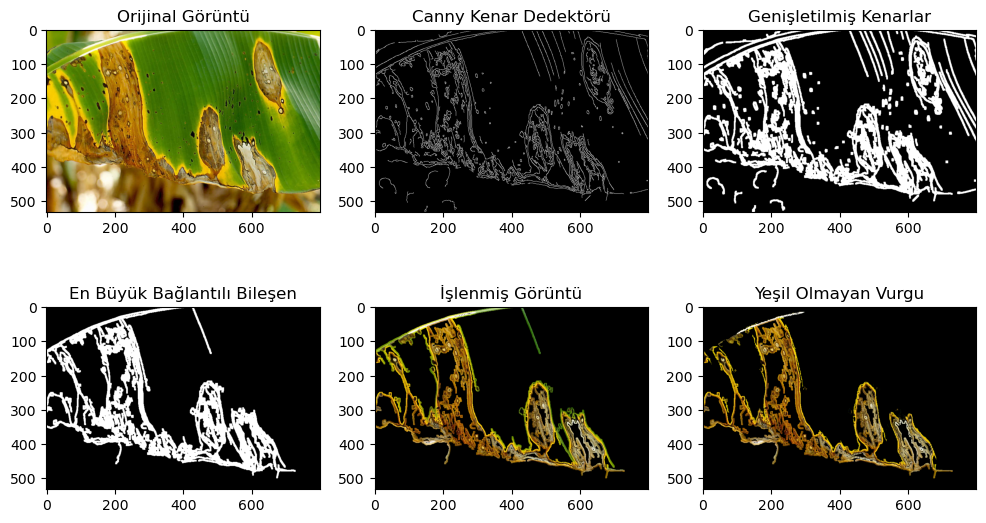

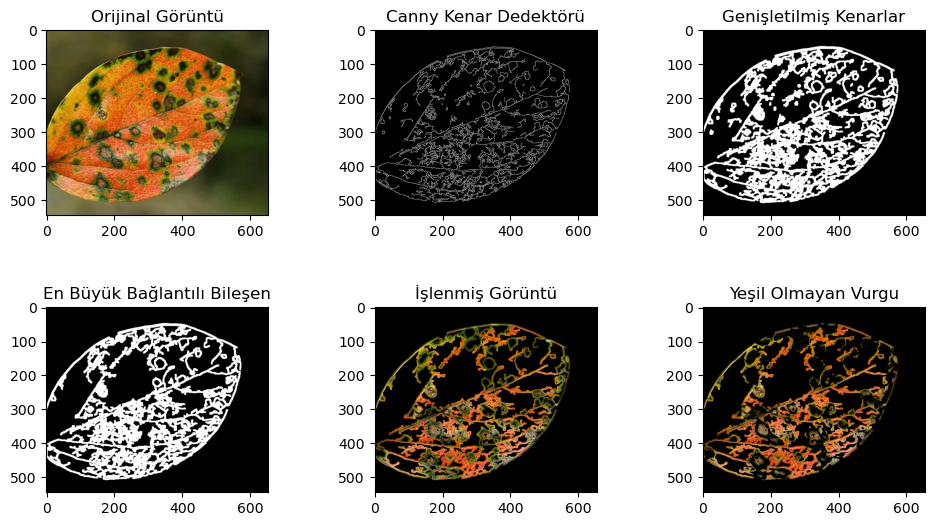

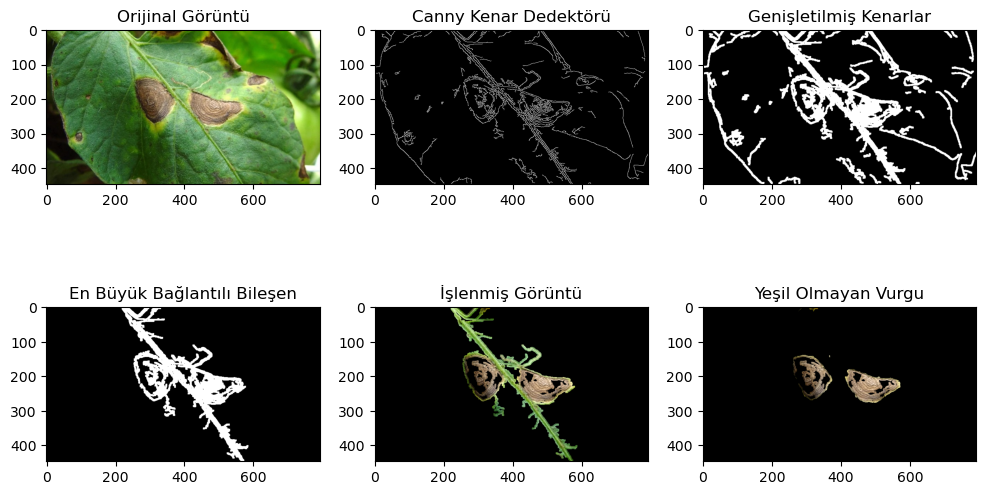

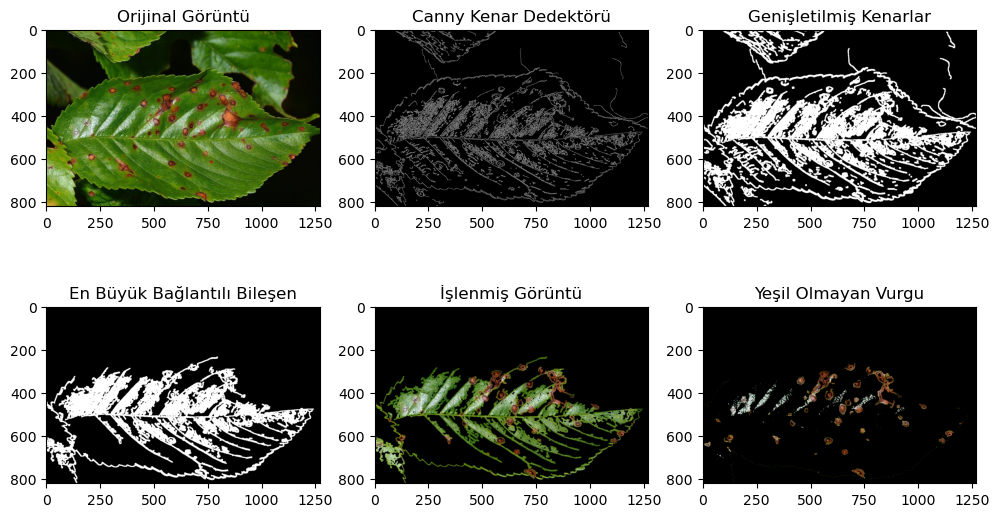

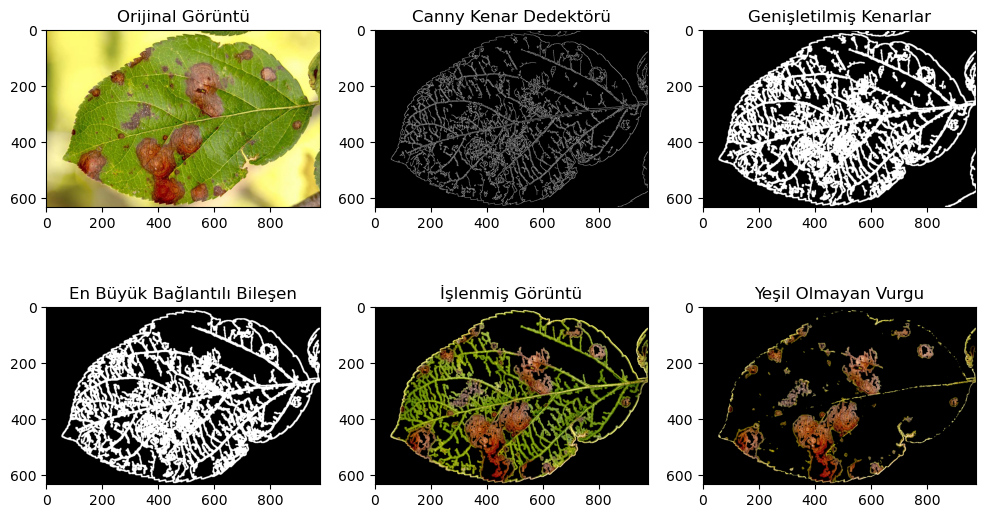

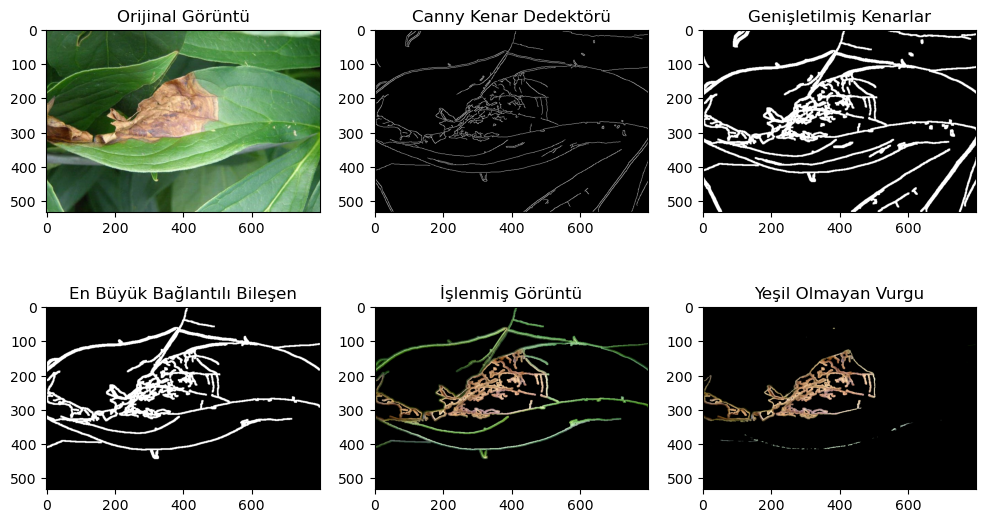

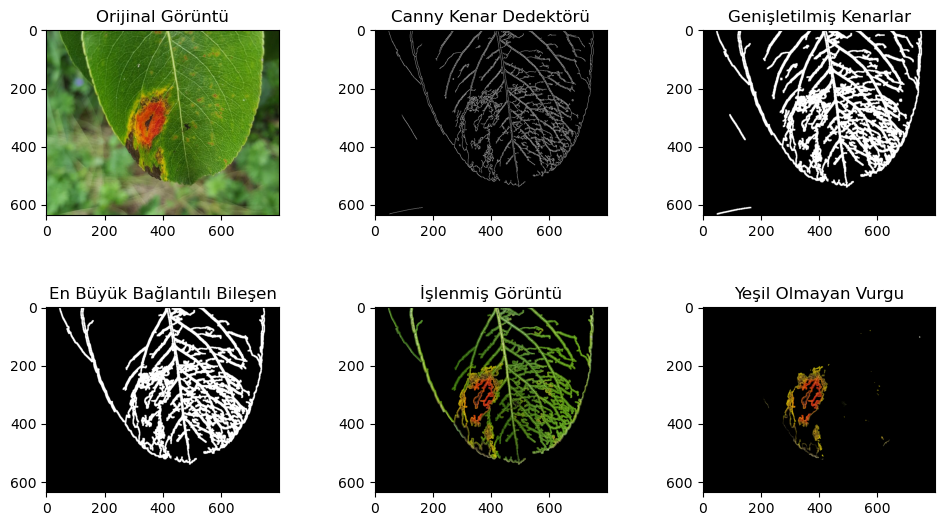

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path, min_component_size=1000):
    # Görüntüyü oku
    image = cv2.imread(image_path)

    # Görüntüyü gri tonlamaya çevir
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Gaussian bulanıklığı uygula
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny kenar dedektörü uygula
    edges = cv2.Canny(blur, 50, 150)

    # Kenarları birleştirmek için kenarları genişlet (dilation)
    dilated_edges = cv2.dilate(edges, None, iterations=2)
   
    # Bağlantılı bileşen analizi yap
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(dilated_edges, connectivity=4)

    # En büyük bağlantılı bileşeni bul (yaprak olarak varsayılan)
    largest_component_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

    # En büyük bağlantılı bileşen için bir maske oluştur
    mask = (labels == largest_component_label).astype(np.uint8) * 255
    # Çekirdeği tanımla 
   
    # Oluşturulan maskeyi orijinal görüntüye uygula
    result = cv2.bitwise_and(image, image, mask=mask)

    # Sonucu HSV renk uzayına dönüştür
    hsv_result = cv2.cvtColor(result, cv2.COLOR_BGR2HSV)

    # HSV renk uzayındaki yeşil renk aralığını tanımla
    lower_green = np.array([30, 40, 40])
    upper_green = np.array([90, 255, 255])

    # Yeşil rengi maskele
    green_mask = cv2.inRange(hsv_result, lower_green, upper_green)

    # Yeşil maskesini tersine çevir, yeşil olmayan alanları vurgula
    non_green_mask = cv2.bitwise_not(green_mask)

    # Tersine çevrilen yeşil maskesini sonuca uygula, yeşil olmayan alanları vurgula
    non_green_highlight = cv2.bitwise_and(result, result, mask=non_green_mask)

    # Sonucu görüntüle
    plt.figure(figsize=(12, 6))

    plt.subplot(231), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Orijinal Görüntü')
    plt.subplot(232), plt.imshow(edges, cmap='gray'), plt.title('Canny Kenar Dedektörü')
    plt.subplot(233), plt.imshow(dilated_edges, cmap='gray'), plt.title('Genişletilmiş Kenarlar')
    plt.subplot(234), plt.imshow(mask, cmap='gray'), plt.title('En Büyük Bağlantılı Bileşen')
    plt.subplot(235), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('İşlenmiş Görüntü')
    plt.subplot(236), plt.imshow(cv2.cvtColor(non_green_highlight, cv2.COLOR_BGR2RGB)), plt.title('Yeşil Olmayan Vurgu')
    plt.subplots_adjust(hspace=0.5)  # Dikey boşluğu arttır
    plt.show()


# Örnek görüntülerle fonksiyonu test et

image_path1 = "bacterial.png"
process_image(image_path1)
image_path2 = "plant.jpg"
process_image(image_path2)
image_path3 = "Leaf-spot-diseases.jpg"
process_image(image_path3)
image_path4 = "red.jpg"
process_image(image_path4)
image_path5 = "hole.jpg"
process_image(image_path5)
image_path6 = "vinede.jpg"
process_image(image_path6)
image_path7 = "frogeye.jpg"
process_image(image_path7)
image_path8 = "leaf.jpeg"
process_image(image_path8)
image_path9 = "peach.jpeg"
process_image(image_path9)
